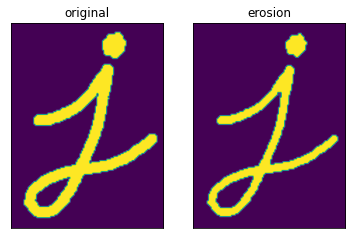

In [5]:
#腐蚀    去除白噪声
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('bai.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img)
plt.xticks([]),plt.yticks([]),plt.title('original')
plt.subplot(122),plt.imshow(erosion)
plt.xticks([]),plt.yticks([]),plt.title('erosion')
plt.show()

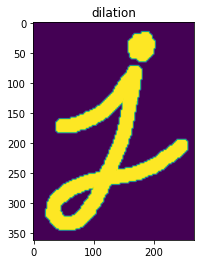

In [5]:
#膨胀  先用腐蚀再用膨胀

dilation = cv2.dilate(img,kernel,iterations=1)
plt.imshow(dilation)
plt.title('dilation')
plt.show()

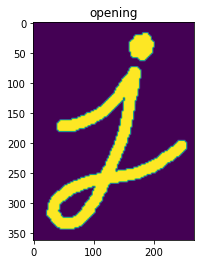

In [6]:
#开运算      先进行腐蚀再进行膨胀
opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
plt.imshow(opening)
plt.title('opening')
plt.show()

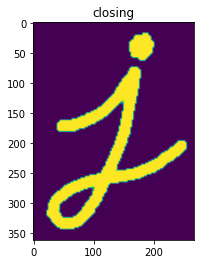

In [8]:
#闭运算  先进行膨胀再进行腐蚀
closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
plt.imshow(closing)
plt.title('closing')
plt.show()

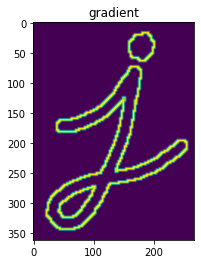

In [9]:
#形态学梯度
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient)
plt.title('gradient')
plt.show()

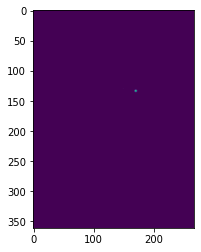

In [11]:
#礼帽      开运算之后图像的差
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
plt.imshow(tophat)
plt.show()

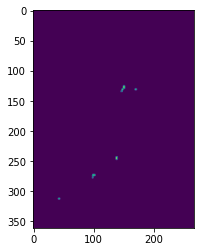

In [12]:
#黑帽 闭运算之后的差
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat)
plt.show()

In [16]:
#结构化元素
print(cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)),'\n')
print(cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)),'\n')
print(cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)))

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]] 

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]] 

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


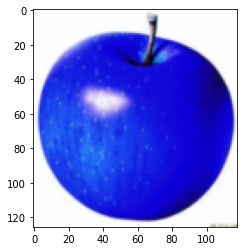

In [11]:
import cv2
img = cv2.imread('apple.jpg')
lower_reso = cv2.pyrDown(img)
higher_reso2 = cv2.pyrUp(lower_reso)

plt.imshow(lower_reso)
# plt.imshow(higher_reso2)

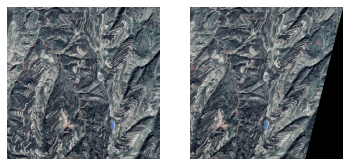

In [6]:
#图像扭曲
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
def AffineTrans(img):
    rows, cols = img.shape[:2]
    pts1 = np.float32([[20, 20], [30, 20], [20, 0]])  # 源图像中的三角形顶点坐标
    pts2 = np.float32([[20, 20], [30, 20], [25, 0]])  # 目标图像中的三角形顶点坐标
    M = cv2.getAffineTransform(pts1, pts2)  # 计算出仿射变换矩阵
    dst = cv2.warpAffine(img, M, (cols, rows))  # 应用仿射变换
    return dst
 
if __name__ == '__main__':
    img = cv2.cvtColor(cv2.imread(r'D:\BaiduNetdiskDownload\test\jpeg\I48E001004_wow_478_zx.jpg'),cv2.COLOR_BGR2RGB)
    affine_img = AffineTrans(img)
    plt.subplot(121),plt.imshow(img)
    plt.axis('off')
    plt.subplot(122),plt.imshow(affine_img)
    plt.axis('off')

(2001, 2001, 3)


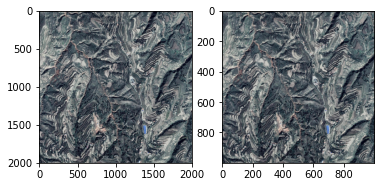

In [9]:
#图像缩放
import cv2 as cv
import matplotlib.pyplot as plt

# 读入原图片
img = cv.imread(r'D:\BaiduNetdiskDownload\test\jpeg\I48E001004_wow_478_zx.jpg')
# 打印出图片尺寸
print(img.shape)
# 将图片高和宽分别赋值给x，y
x, y = img.shape[0:2]
 
# 显示原图
# cv.imshow('OriginalPicture', img)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img)
 
# 缩放到原来的二分之一，输出尺寸格式为（宽，高）
img_test1 = cv.resize(img, (int(y / 2), int(x / 2)))
# cv.imshow('resize0', img_test1)
# cv.waitKey()
plt.subplot(122),plt.imshow(img_test1)
 
# 最近邻插值法缩放
# 缩放到原来的四分之一
img_test2 = cv.resize(img, (0, 0), fx=0.25, fy=0.25, interpolation=cv.INTER_NEAREST)
cv.imshow('resize1', img_test2)
cv.waitKey()
cv.destroyAllWindows()